<a href="https://colab.research.google.com/github/lokeshkumarn/Notebooks/blob/master/2B_Deep_Neural_Network_with_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Network with Dropout using Keras

In [ ]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers


import random
import numpy as np

In [ ]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset

In [ ]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

## DNN Model

Using Keras, create the DNN or Sequential Model

In [ ]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [ ]:
# Layer 1 = input layer
# specify the input size for in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))


# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))

# Add dropout of 50% to layer 2
dnnModel.add(layers.Dropout(0.5))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))

# Add dropout of 50% to layer 3
dnnModel.add(layers.Dropout(0.5))

# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3060      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
Total params: 44,450
Trainable params: 44,450
Non-trainable params: 0
____________________________________________________

## Regularization and Optimizations of DNN

In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [ ]:
# train the model

h = dnnModel.fit( Xtrain, Ytrain, validation_split=0.2, epochs=25, batch_size=64)

Epoch 1/25
750/750 [==============================] - 2s 2ms/step - loss: 0.9649 - accuracy: 0.6892 - val_loss: 0.2489 - val_accuracy: 0.9319
Epoch 2/25
750/750 [==============================] - 2s 2ms/step - loss: 0.4748 - accuracy: 0.8666 - val_loss: 0.2028 - val_accuracy: 0.9451
Epoch 3/25
750/750 [==============================] - 1s 2ms/step - loss: 0.3667 - accuracy: 0.9003 - val_loss: 0.1717 - val_accuracy: 0.9526
Epoch 4/25
750/750 [==============================] - 1s 2ms/step - loss: 0.3110 - accuracy: 0.9160 - val_loss: 0.1592 - val_accuracy: 0.9571
Epoch 5/25
750/750 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9260 - val_loss: 0.1470 - val_accuracy: 0.9628
Epoch 6/25
750/750 [==============================] - 1s 2ms/step - loss: 0.2457 - accuracy: 0.9329 - val_loss: 0.1437 - val_accuracy: 0.9650
Epoch 7/25
750/750 [==============================] - 1s 2ms/step - loss: 0.2338 - accuracy: 0.9348 - val_loss: 0.1448 - val_accuracy: 0.9643
Epoch 

In [ ]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy ', h.history['accuracy'][-1])

Final training loss 	 0.1234714463353157
Final training accuracy  0.9628750085830688


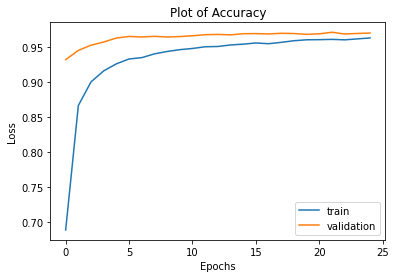

In [ ]:
# plot the training  accuracy  
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

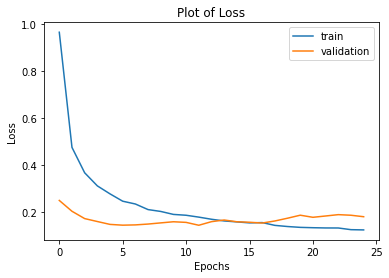

In [ ]:
# plot the traininig loss 


plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

## Testing the Model

In [ ]:
# testing the model

testLoss, testAccuracy = dnnModel.evaluate( Xtest, Ytest)

313/313 [==============================] - 0s 921us/step - loss: 0.1796 - accuracy: 0.9715


In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.17961254715919495
Testing accuracy  0.9714999794960022


Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer